# Scikit-learnと機械学習

機械学習のためのPythonライブラリscikit-learnの使い方<br>

## 目次
- [参考リンク](#reference)
- [Scikit-learnとは](#what)
- [はじめに](#begining)
    - [サンプルデータセット](#sample)
- [教師あり学習](#supervised)
    - [学習データ/検証データ](#training-test)
    - [さまざまな分類アルゴリズム](#classification)
        - [ロジスティック回帰](#logisticr-c)
        - [K-means法による分類](#kmeans-c)
        - [SVM-Classificationによる分類（線形カーネル）](#svm-c-linear)
        - [SVM-Classificationによる分類（RBFカーネル）](#svm-c-rbf)
        - [SVM-Classificationによる分類（多項式カーネル）](#svm-c-poly)
        - [RandomForest Classifier](#rf-c)
- [教師無し学習](#unsupervised)
    - [次元縮約](#di-reduction)
        - [主成分分析（PCA）](#pca)
        - [多次元尺度構成法（MDS）](#mds)
    


---
 <a name = "reference"></a>

## 参考リンク
- [scikit-learn](http://scikit-learn.org/stable/supervised_learning.html)

 <a name = "what"></a>

## Scikit-learnとは


Pythonの機械学習ライブラリ。<br>
様々なアルゴリズムが含まれており、シンプルなAPIで使用することができる<br>



---
 <a name = "begining"></a>

## はじめに
 <a name = "sample"></a>

### サンプルデータセット

さまざまなサンプルデータが用意されている

- load_boston
    - ボストンの家賃データ
    - 回帰
- load_iris
    - アイリスの品種データ
    - 分類
- load_diabetes
    - 体重データ
    - 回帰
- load_digits
    - 8×8の手書き数字データ
    - 分類

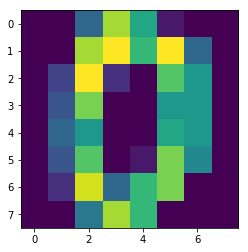

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(datasets.load_digits().data[0].reshape(8,8))

 <a name = "supervised"></a>

## 教師あり学習
インプットとラベルのデータから関数を学習する

scikit-learnでは、どのアルゴリズムでもインターフェースが以下に統一されている。

- 分類器のオブジェクトを生成
- fit()に訓練データを与えて分類器のパラメータを学習（Training)
- predict()にテストデータを与えて予測（Prediction）
- score()で分類器の性能を評価（Evaluation）


In [2]:
# irisのデータを使用。データとターゲットに分ける

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

 <a name = "training-test"></a>

### 学習データ/ 検証データ

学習の際、必ずデータを**学習に使うデータ**と**検証に使うデータ**に分割する

- 学習済みのモデルを評価するために必要
- 学習データを2/3、検証データを1/3程度にするのが一般的


In [3]:
# まずはデータをシャッフルする
import numpy as np
rng = np.random.RandomState(0)
permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]

In [4]:
# 分割は、sklearn.cross_validation.train_test_splitを使うとよい
from sklearn.model_selection import train_test_split

# train_sizeでトレーニングの比率を設定
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=1999)


In [5]:
# 分類結果の可視化プロット
def plot_classification(clf):
    h = .02  # step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

    plt.scatter(train_X[:,0],train_X[:,1],c=train_y,cmap=plt.cm.coolwarm)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])


---
 <a name = "classification"></a>

### さまざまな分類アルゴリズム

 <a name = "logisticr-c"></a>

#### ロジスティック回帰（分類）の例


In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()  # classifier: f()

# fit()で学習
classifier.fit(train_X, train_y)

# predict()で予測
prediction = classifier.predict(test_X)

# 性能の評価
print("score: {:.3f}".format(classifier.score(test_X,test_y)))

score: 0.633


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


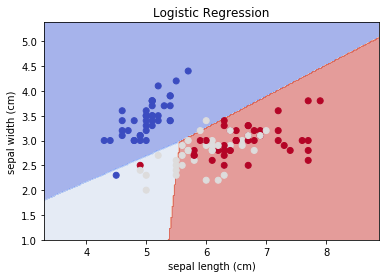

In [7]:
# 分類の可視化
plt.title("Logistic Regression")
plot_classification(classifier)

 <a name = "kmeans-c"></a>

#### K-means法による分類

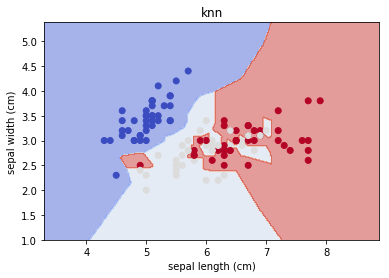

score: 0.700


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# 学習
knn.fit(train_X, train_y)

plt.title("knn")
plot_classification(knn)
plt.show()

print("score: {:.3f}".format(knn.score(test_X,test_y)))

 <a name = "svm-c-linear"></a>

#### SVM-Classificationによる分類（線形カーネル）

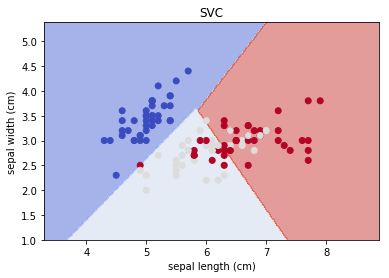

score: 0.767


In [9]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")

plt.title("SVC")
svc.fit(train_X,train_y)
plot_classification(svc)
plt.show()

print("score: {:.3f}".format(svc.score(test_X,test_y)))

 <a name = "svm-c-rbf"></a>
 
 #### SVM-Classificationによる分類（RBFカーネル）

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


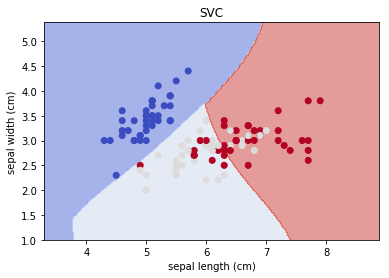

score: 0.767


In [10]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf")

plt.title("SVC")
svc.fit(train_X,train_y)
plot_classification(svc)
plt.show()

print("score: {:.3f}".format(svc.score(test_X,test_y)))

 <a name = "poly"></a>

#### SVM-Classificationによる分類（多項式カーネル）

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


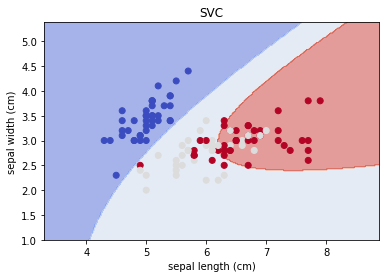

score: 0.733


In [11]:
from sklearn.svm import SVC
svc = SVC(kernel="poly")

plt.title("SVC")
svc.fit(train_X,train_y)
plot_classification(svc)
plt.show()

print("score: {:.3f}".format(svc.score(test_X,test_y)))

 <a name = "rf-c"></a>
 
#### RandomForest Classifier

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


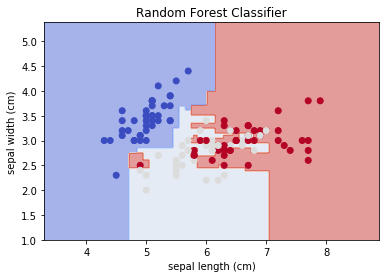

score: 0.733


In [12]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()

plt.title("Random Forest Classifier")
rfclf.fit(train_X,train_y)
plot_classification(rfclf)
plt.show()

print("score: {:.3f}".format(rfclf.score(test_X,test_y)))

 <a name = "unsupervised"></a>
 
## 教師なし学習

教師無しでの次元縮約の例<br>
同アイリスデータセットを４次元→2次元に圧縮


---
 <a name = "di-reduction"></a>

### 次元縮約

 <a name = "pca"></a>
#### 主成分分析（PCA）

In [13]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)
y = iris.target

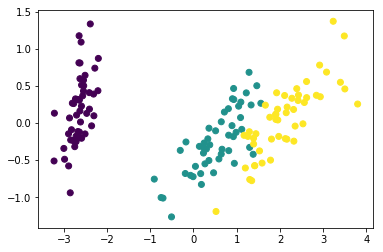

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y) 

#### 次元を圧縮したものを、再度教師ありで分類

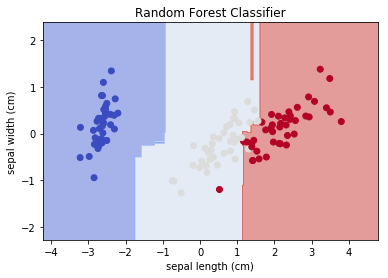

score: 0.967


In [15]:
X, y = X[permutation], y[permutation]
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=1999)

plt.title("Random Forest Classifier")
rfclf.fit(train_X,train_y)
plot_classification(rfclf)
plt.show()

print("score: {:.3f}".format(rfclf.score(test_X,test_y)))

 <a name = "mds"></a>
 
#### 多次元尺度構成法（MDS）

In [16]:
from sklearn import manifold
mds = manifold.MDS(n_components=2)
mds.fit(iris.data)
X = mds.fit_transform(iris.data)
y = iris.target

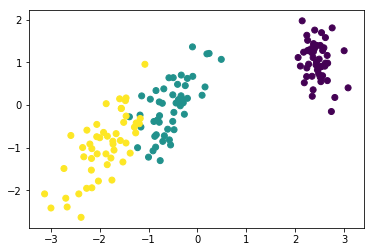

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y) 

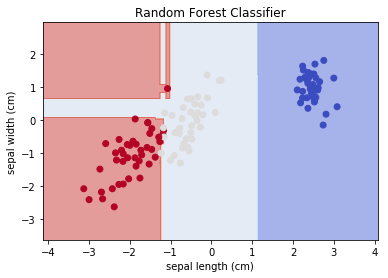

score: 0.867


In [18]:
X, y = X[permutation], y[permutation]
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=1999)

plt.title("Random Forest Classifier")
rfclf.fit(train_X,train_y)
plot_classification(rfclf)
plt.show()

print("score: {:.3f}".format(rfclf.score(test_X,test_y)))